<a href="https://colab.research.google.com/github/naashonomics/genai_random/blob/main/Text2Image_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install diffusers["torch"] transformers
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
import pandas as pd
import os
from PIL import Image
import torch

import diffusers
from diffusers import VQDiffusionPipeline
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# loading pre-trained model
#pipeline = VQDiffusionPipeline.from_pretrained("microsoft/vq-diffusion-ithq")
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [5]:
# @title String fields
#text_input = 'flying batman with colorful sky' # @param {type:"string"}
# e.g.
text_input ='flying animals with blue sky and white clouds'

  0%|          | 0/50 [00:00<?, ?it/s]

1 / 5  --- generated


  0%|          | 0/50 [00:00<?, ?it/s]

2 / 5  --- generated


  0%|          | 0/50 [00:00<?, ?it/s]

3 / 5  --- generated


  0%|          | 0/50 [00:00<?, ?it/s]

4 / 5  --- generated


  0%|          | 0/50 [00:00<?, ?it/s]

5 / 5  --- generated


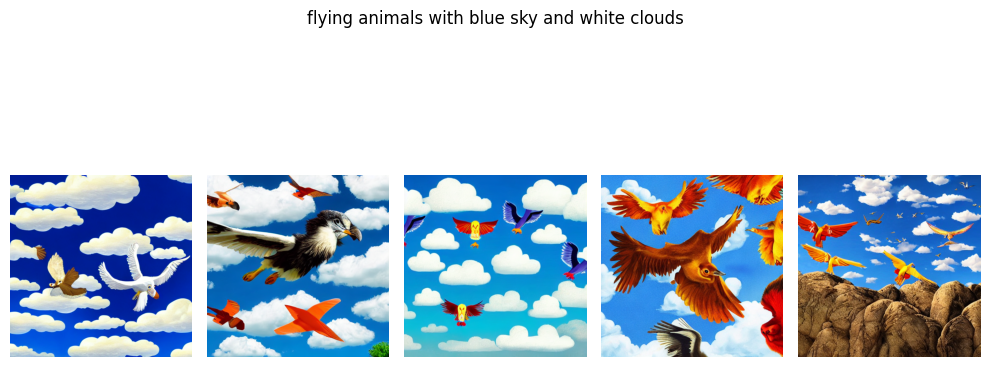

In [6]:
plt.figure(figsize=(10,5))
max_images = 5
for x in range(max_images):
  prompt = text_input
  image = pipeline(prompt).images[0]
  plt.subplot(1,5,x+1); plt.imshow(image); plt.axis('off')
  print(x+1,'/',max_images,' --- generated')
plt.suptitle(text_input)
plt.tight_layout()